In [2]:
def AND_gate(x1,x2):
    w1=0.5
    w2=0.5
    b=-0.7

    result = x1*w1 + x2*w2 + b
    if result <=0:
        return 0
    else:
        return 1

AND_gate(0, 0), AND_gate(0, 1), AND_gate(1, 0), AND_gate(1, 1)

(0, 0, 0, 1)

In [1]:
# single layer perceptron
import torch
import torch.nn as nn
device = 'cuda' if torch.cuda.is_available() else 'cpu'
torch.manual_seed(777)
if device == 'cuda':
    torch.cuda.manual_seed_all(777)

X = torch.FloatTensor([[0, 0], [0, 1], [1, 0], [1, 1]]).to(device)
Y = torch.FloatTensor([[0], [1], [1], [0]]).to(device)

linear = nn.Linear(2,1, bias=True)
sigmoid = nn.Sigmoid()
model = nn.Sequential(linear,sigmoid).to(device)

criterion = nn.BCELoss().to(device)
optimizer = torch.optim.SGD(model.parameters(), lr=1)

for step in range(10001):
    optimizer.zero_grad()
    hypothesis = model(X)

    cost = criterion(hypothesis, Y)
    cost.backward()
    optimizer.step()

    if step%100 == 0:
        print(step, cost.item())

0 0.7273973822593689
100 0.6931475400924683
200 0.6931471824645996
300 0.6931471824645996
400 0.6931471824645996
500 0.6931471824645996
600 0.6931471824645996
700 0.6931471824645996
800 0.6931471824645996
900 0.6931471824645996
1000 0.6931471824645996
1100 0.6931471824645996
1200 0.6931471824645996
1300 0.6931471824645996
1400 0.6931471824645996
1500 0.6931471824645996
1600 0.6931471824645996
1700 0.6931471824645996
1800 0.6931471824645996
1900 0.6931471824645996
2000 0.6931471824645996
2100 0.6931471824645996
2200 0.6931471824645996
2300 0.6931471824645996
2400 0.6931471824645996
2500 0.6931471824645996
2600 0.6931471824645996
2700 0.6931471824645996
2800 0.6931471824645996
2900 0.6931471824645996
3000 0.6931471824645996
3100 0.6931471824645996
3200 0.6931471824645996
3300 0.6931471824645996
3400 0.6931471824645996
3500 0.6931471824645996
3600 0.6931471824645996
3700 0.6931471824645996
3800 0.6931471824645996
3900 0.6931471824645996
4000 0.6931471824645996
4100 0.6931471824645996
4200

In [2]:
with torch.no_grad():
    hypothesis = model(X)
    predicted = (hypothesis>0.5).float()
    accuracy = (predicted==Y).float().mean()
    print('모델의 출력값(Hypothesis): ', hypothesis.detach().cpu().numpy())
    print('모델의 예측값(Predicted): ', predicted.detach().cpu().numpy())
    print('실제값(Y): ', Y.cpu().numpy())
    print('정확도(Accuracy): ', accuracy.item())

모델의 출력값(Hypothesis):  [[0.5]
 [0.5]
 [0.5]
 [0.5]]
모델의 예측값(Predicted):  [[0.]
 [0.]
 [0.]
 [0.]]
실제값(Y):  [[0.]
 [1.]
 [1.]
 [0.]]
정확도(Accuracy):  0.5


In [3]:
# multi-layer perceptron
import torch
import torch.nn as nn

device = 'cuda' if torch.cuda.is_available() else 'cpu'

# for reproducibility
torch.manual_seed(777)
if device == 'cuda':
    torch.cuda.manual_seed_all(777)

X = torch.FloatTensor([[0, 0], [0, 1], [1, 0], [1, 1]]).to(device)
Y = torch.FloatTensor([[0], [1], [1], [0]]).to(device)

model = nn.Sequential(
    nn.Linear(2,10),
    nn.Sigmoid(),
    nn.Linear(10,10),
    nn.Sigmoid(),
    nn.Linear(10,10),
    nn.Sigmoid(),
    nn.Linear(10,1),
    nn.Sigmoid()
).to(device)

criterion = torch.nn.BCELoss().to(device)
optimizer = torch.optim.SGD(model.parameters(), lr=1)

for epoch in range(10001):
    optimizer.zero_grad()
    # forward 연산
    hypothesis = model(X)

    # 비용 함수
    cost = criterion(hypothesis, Y)
    cost.backward()
    optimizer.step()

    # 100의 배수에 해당되는 에포크마다 비용을 출력
    if epoch % 100 == 0:
        print(epoch, cost.item())


0 0.6948983669281006
100 0.693155825138092
200 0.6931535005569458
300 0.6931514143943787
400 0.6931492686271667
500 0.6931473016738892
600 0.6931453943252563
700 0.6931434869766235
800 0.6931416392326355
900 0.6931397914886475
1000 0.6931380033493042
1100 0.6931361556053162
1200 0.6931343078613281
1300 0.6931324005126953
1400 0.6931304931640625
1500 0.6931284666061401
1600 0.6931264400482178
1700 0.6931242942810059
1800 0.6931220293045044
1900 0.6931196451187134
2000 0.6931171417236328
2100 0.6931145191192627
2200 0.6931116580963135
2300 0.6931085586547852
2400 0.693105161190033
2500 0.6931014657020569
2600 0.6930974721908569
2700 0.6930930614471436
2800 0.6930880546569824
2900 0.6930825710296631
3000 0.6930763721466064
3100 0.6930692791938782
3200 0.6930612325668335
3300 0.6930519342422485
3400 0.6930411458015442
3500 0.693028450012207
3600 0.6930133104324341
3700 0.6929951906204224
3800 0.6929729580879211
3900 0.6929453015327454
4000 0.6929103136062622
4100 0.6928648948669434
4200 0.

In [4]:
with torch.no_grad():
    hypothesis = model(X)
    predicted = (hypothesis>0.5).float()
    accuracy = (predicted==Y).float().mean()
    print('모델의 출력값(Hypothesis): ', hypothesis.detach().cpu().numpy())
    print('모델의 예측값(Predicted): ', predicted.detach().cpu().numpy())
    print('실제값(Y): ', Y.cpu().numpy())
    print('정확도(Accuracy): ', accuracy.item())

모델의 출력값(Hypothesis):  [[1.1169876e-04]
 [9.9982882e-01]
 [9.9984229e-01]
 [1.8530559e-04]]
모델의 예측값(Predicted):  [[0.]
 [1.]
 [1.]
 [0.]]
실제값(Y):  [[0.]
 [1.]
 [1.]
 [0.]]
정확도(Accuracy):  1.0


In [5]:
# 손글씨 분류
%matplotlib inline
import matplotlib.pyplot as plt # 시각화를 위한 맷플롯립
from sklearn.datasets import load_digits
digits = load_digits() # 1,979개의 이미지 데이터 로드

digits.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [6]:
digits.target[0]

0

In [7]:
print('전체 샘플의 수 : {}'.format(len(digits.images)))


전체 샘플의 수 : 1797


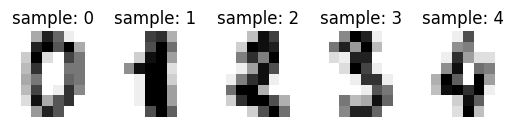

In [8]:
images_and_labels = list(zip(digits.images, digits.target))
for index, (image, label) in enumerate(images_and_labels[:5]): # 5개의 샘플만 출력
    plt.subplot(2, 5, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('sample: %i' % label)


In [9]:
print(digits.data[0])


[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]


In [10]:
X = digits.data
Y = digits.target
X = torch.tensor(X, dtype=torch.float32)
Y = torch.tensor(Y, dtype=torch.int64)

model = nn.Sequential(
    nn.Linear(64, 32),
    nn.ReLU(),
    nn.Linear(32,16),
    nn.ReLU(),
    nn.Linear(16,10)
)

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters())
losses = []

for epoch in range(100):
    optimizer.zero_grad()
    y_pred = model(X)
    loss = loss_fn(y_pred, Y)
    loss.backward()
    optimizer.step()

    if epoch%10==0:
        print(f'epoch {epoch:4d} cost: {loss.item():.6f}')
    
    losses.append(loss.item())

epoch    0 cost: 2.381846
epoch   10 cost: 2.086940
epoch   20 cost: 1.844464
epoch   30 cost: 1.555461
epoch   40 cost: 1.246399
epoch   50 cost: 0.968080
epoch   60 cost: 0.724301
epoch   70 cost: 0.519611
epoch   80 cost: 0.380549
epoch   90 cost: 0.293360


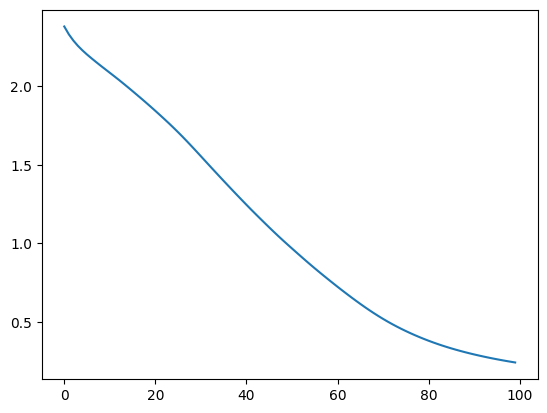

In [11]:
plt.plot(losses)

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1, cache=True, as_frame=False)
mnist.data[0]

d:\miniconda\lib\site-packages\sklearn\datasets\_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

In [14]:
mnist.target[0]

'5'

In [15]:
mnist.target = mnist.target.astype(np.int8)
X = mnist.data/255
y = mnist.target
X[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

이 이미지 데이터의 레이블은 5이다


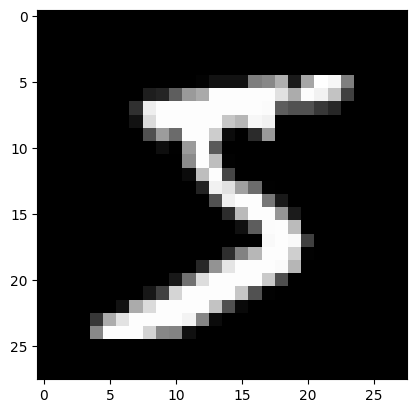

In [16]:
plt.imshow(X[0].reshape(28,28), cmap='gray')
print("이 이미지 데이터의 레이블은 {:.0f}이다".format(y[0]))

In [17]:
import torch
from torch.utils.data import TensorDataset, DataLoader
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=1/7, random_state=0)

X_train = torch.Tensor(X_train)
X_test = torch.Tensor(X_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

ds_train = TensorDataset(X_train, y_train)
ds_test = TensorDataset(X_test, y_test)

loader_train = DataLoader(ds_train, batch_size=64, shuffle=True)
loader_test = DataLoader(ds_test, batch_size=64, shuffle=False)

In [18]:
from torch import nn

model = nn.Sequential()
model.add_module('fc1', nn.Linear(28*28*1, 100))
model.add_module('relu1', nn.ReLU())
model.add_module('fc2', nn.Linear(100, 100))
model.add_module('relu2', nn.ReLU())
model.add_module('fc3', nn.Linear(100, 10))

print(model)


Sequential(
  (fc1): Linear(in_features=784, out_features=100, bias=True)
  (relu1): ReLU()
  (fc2): Linear(in_features=100, out_features=100, bias=True)
  (relu2): ReLU()
  (fc3): Linear(in_features=100, out_features=10, bias=True)
)


In [22]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

def train(epoch):
    model.train()

    for data, targets in loader_train:
        optimizer.zero_grad()
        outputs = model(data)
        loss = loss_fn(outputs, targets)
        loss.backward()
        optimizer.step()

    print(f'epoch {epoch} 완료!\n')

def test():
    model.eval()
    correct = 0

    with torch.no_grad():
        for data, targets in loader_test:
            outputs = model(data)

            _, predicted = torch.max(outputs.data, 1)
            correct += predicted.eq(targets.data.view_as(predicted)).sum()
    
    data_num = len(loader_test.dataset)
    print('\n테스트 데이터에서 예측 정확도: {}/{} ({:.0f}%)\n'.format(correct,
                                                   data_num, 100. * correct / data_num))

In [20]:
test()


테스트 데이터에서 예측 정확도: 972/10000 (10%)



In [23]:
for epoch in range(3):
    train(epoch)

test()

epoch 0 완료!

epoch 1 완료!

epoch 2 완료!


테스트 데이터에서 예측 정확도: 9617/10000 (96%)



예측 결과 2
이 이미지 데이터의 정답 레이블은 2입니다


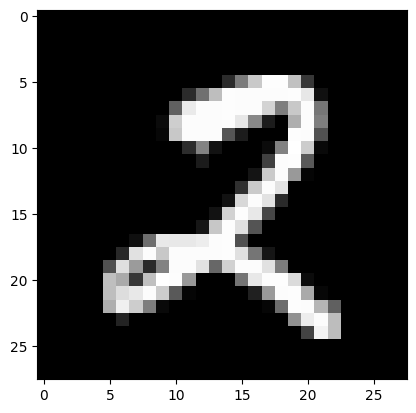

In [24]:
index = 2018

model.eval()
data = X_test[index]
output = model(data)
_, predicted = torch.max(output.data, 0)
print(f"예측 결과 {predicted}")
X_test_show = (X_test[index]).numpy()
plt.imshow(X_test_show.reshape(28,28), cmap='gray')
print(f'이 이미지 데이터의 정답 레이블은 {y_test[index]:.0f}입니다')